<a href="https://colab.research.google.com/github/erzdwin/Talento_Tech_IA/blob/main/Digits_Regresion_Logistica_CM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import linear_model
from sklearn import model_selection
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

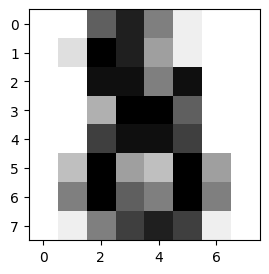

In [ ]:
#Load digits dataset
digits = datasets.load_digits()

#Display digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [ ]:
print(digits.data.shape)

(1797, 64)


In [ ]:
X = digits.data
y = digits.target

In [ ]:
#Particionando los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Crear una instancia del modelo de Regresión Logística
model=linear_model.LogisticRegression()
model.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
# Hacer predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Imprimir los valores predichos
print("Valores predichos:")
print(y_pred)


Valores predichos:
[6 9 3 7 2 1 5 2 5 2 1 9 4 0 4 2 3 7 8 8 4 3 9 7 5 6 3 5 6 3 4 9 1 4 4 6 9
 4 7 6 6 9 1 3 6 1 3 0 6 5 5 1 9 5 6 0 9 0 0 1 0 4 5 2 4 5 7 0 7 5 9 5 5 4
 7 0 4 5 5 9 9 0 2 3 8 0 6 4 4 9 1 2 8 3 5 2 9 0 4 4 4 3 5 3 1 3 5 9 4 2 7
 7 4 4 1 9 2 7 8 7 2 6 9 4 0 7 2 7 5 8 7 5 7 7 0 6 6 4 2 8 0 9 4 6 9 9 6 9
 0 3 5 6 6 0 6 4 3 9 3 9 7 2 9 0 4 5 3 6 5 9 9 8 4 2 1 3 7 7 2 2 3 9 8 0 3
 2 2 5 6 9 9 4 1 5 4 2 3 6 4 8 5 9 5 7 8 9 4 8 1 5 4 4 9 6 1 8 6 0 4 5 2 7
 4 6 4 5 6 0 3 2 3 6 7 1 5 1 4 7 6 8 8 5 5 1 6 2 8 8 9 9 7 6 2 2 2 3 4 8 8
 3 6 0 9 7 7 0 1 0 4 5 1 5 3 6 0 4 1 0 0 3 6 5 9 7 3 5 5 9 9 8 5 3 3 2 0 5
 8 3 4 0 2 4 6 4 3 4 5 0 5 2 1 3 1 4 1 1 7 0 1 5 2 1 2 8 7 0 6 4 8 8 5 1 8
 4 5 8 7 9 8 5 0 6 2 0 7 9 8 9 5 2 7 7 1 8 7 4 3 8 3 5 6 0 0 3 0 5 0 0 4 1
 2 8 4 5 9 6 3 1 8 8 4 2 3 8 9 8 8 5 0 6 3 3 7 1 6 4 1 2 1 1 6 4 7 4 8 3 4
 0 5 1 9 4 5 7 6 3 7 0 5 9 7 5 9 7 4 2 1 9 0 7 5 3 3 6 3 9 6 9 5 0 1 5 5 8
 3 3 6 2 6 5 5 2 0 8 7 3 7 0 2 2 3 5 8 7 3 6 5 9 9 2 5 6 3 0 7 1 1 9 6 1 1
 0 0 2

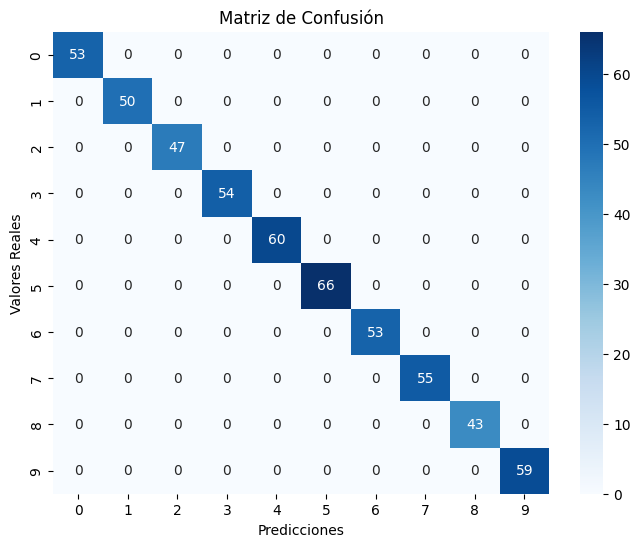

In [ ]:
# Grafica la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       1.00      1.00      1.00        54
           4       1.00      1.00      1.00        60
           5       1.00      1.00      1.00        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       1.00      1.00      1.00        59

    accuracy                           1.00       540
   macro avg       1.00      1.00      1.00       540
weighted avg       1.00      1.00      1.00       540



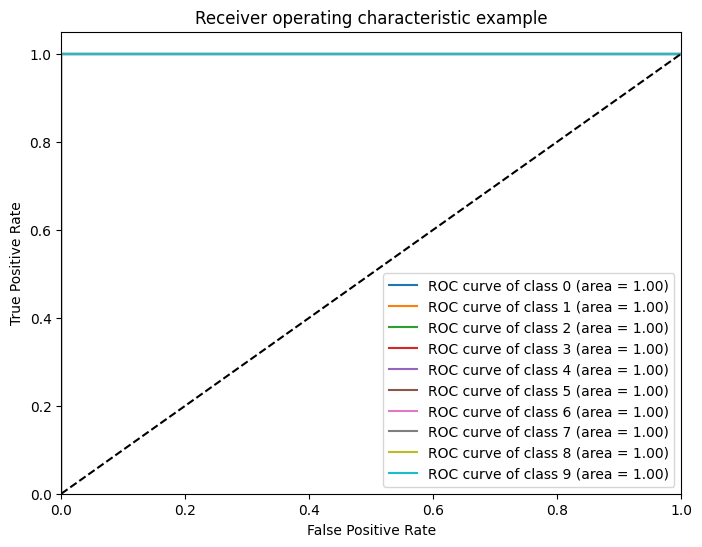

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Binarizar las etiquetas (necesario para la curva ROC multiclase)
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin = label_binarize(y_pred, classes=np.unique(y_test))

# Calcular la curva ROC y el AUC para cada clase
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Graficar la curva ROC para cada clase
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

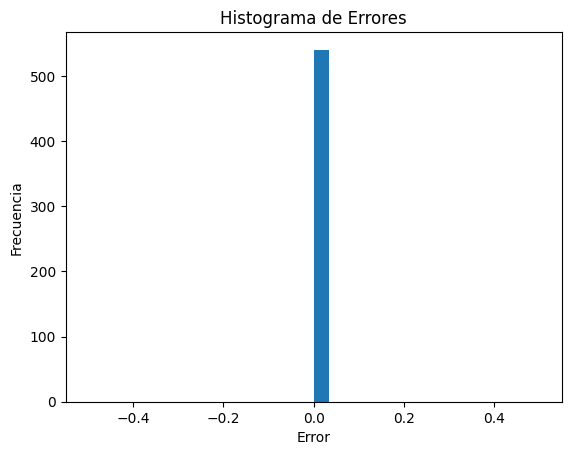

In [ ]:
#Calcular errores
errores = y_test - y_pred

plt.hist(errores, bins=30)  # Ajusta el número de bins según sea necesario
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.title("Histograma de Errores")
plt.show()

Modelo de sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression

sklear_model = LogisticRegression()
sklear_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

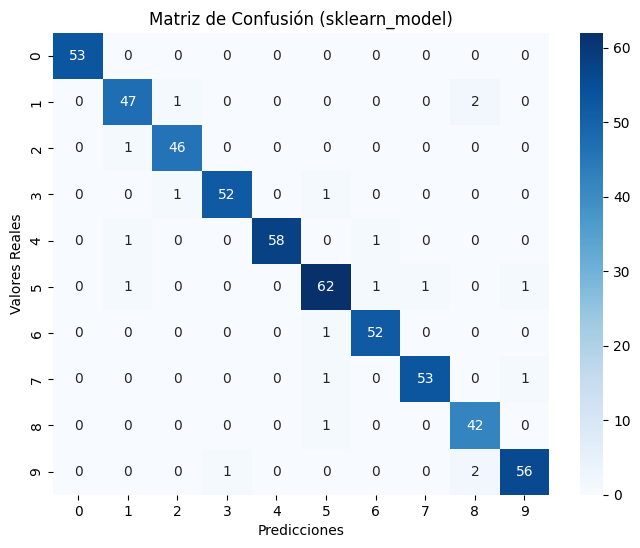

In [ ]:
y_pred_sklearn = sklear_model.predict(X_test)

# Calculate the confusion matrix
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_sklearn, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión (sklearn_model)")
plt.xlabel("Predicciones")
plt.ylabel("Valores Reales")
plt.show()

In [ ]:
report_sklearn = classification_report(y_test, y_pred_sklearn)
print(report_sklearn)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       0.94      0.94      0.94        50
           2       0.96      0.98      0.97        47
           3       0.98      0.96      0.97        54
           4       1.00      0.97      0.98        60
           5       0.94      0.94      0.94        66
           6       0.96      0.98      0.97        53
           7       0.98      0.96      0.97        55
           8       0.91      0.98      0.94        43
           9       0.97      0.95      0.96        59

    accuracy                           0.96       540
   macro avg       0.96      0.97      0.96       540
weighted avg       0.97      0.96      0.96       540



precision = TP / (TP + FP)  
recall = TP / (TP + FN)
f1_score = 2 * (precision * recall) / (precision + recall)

In [ ]:
Accuracy = (53+47+46+52+58+62+52+53+42+56) /(53+0+0+0+0+0+0+0+0+0+0+47+1+0+0+0+0+0+0+2+0+1+46+0+0+0+0+0+0+0+0+0+1+52+0+1+0+0+0+0+0+1+0+0+58+0+1+0+0+0+0+1+0+0+1+62+1+1+0+1+0+0+1+0+1+0+52+0+0+0+0+0+0+0+1+0+1+53+0+1+0+0+0+0+1+0+0+0+42+0+0+0+0+0+0+0+0+2+0+56)
Accuracy

0.9612546125461254

In [ ]:
#clase 0
P0 = 53/(53+0)
R0 = 53/(53+0)
F10= 2*(P*R)/(P+R)

print ("Precision: ", P0)
print ("Recall: ", R0)
print ("F1: ", F10)

Precision:  1.0
Recall:  1.0
F1:  1.0


In [ ]:
#clase 1
#precision = TP / (TP + FP) recall = TP / (TP + FN)
P1 = 47/(47+2)
R1 = 47/(47+3)
F11= 2*(P1*R1)/(P1+R1)

print ("Precision: ", P1)
print ("Recall: ", R1)
print ("F1: ", F11)

Precision:  0.9591836734693877
Recall:  0.94
F1:  0.9494949494949495


In [ ]:
#clase 2
#precision = TP / (TP + FP) recall = TP / (TP + FN)
P2 = 46/(46+2)
R2 = 46/(46+1)
F12= 2*(P2*R2)/(P2+R2)

print ("Precision: ", P2)
print ("Recall: ", R2)
print ("F1: ", F12)

Precision:  0.9583333333333334
Recall:  0.9787234042553191
F1:  0.968421052631579


In [ ]:
#clase 3
#precision = TP / (TP + FP) recall = TP / (TP + FN)
P3 = 52/(52+2)
R3 = 52/(52+1)
F13= 2*(P3*R3)/(P3+R3)

print ("Precision: ", P3)
print ("Recall: ", R3)
print ("F1: ", F13)

Precision:  0.9629629629629629
Recall:  0.9811320754716981
F1:  0.9719626168224299


In [ ]:
#clase 4
#precision = TP / (TP + FP) recall = TP / (TP + FN)
P4 = 58/(58+2)
R4 = 58/(58+2)
F14= 2*(P4*R4)/(P4+R4)

print ("Precision: ", P4)
print ("Recall: ", R4)
print ("F1: ", F14)

Precision:  0.9666666666666667
Recall:  0.9666666666666667
F1:  0.9666666666666667


In [ ]:
#clase 5
#precision = TP / (TP + FP) recall = TP / (TP + FN)
P5 = 62/(62+3)
R5 = 62/(62+2)
F15= 2*(P5*R5)/(P5+R5)

print ("Precision: ", P5)
print ("Recall: ", R5)
print ("F1: ", F15)

Precision:  0.9591836734693877
Recall:  0.94
F1:  0.9494949494949495


In [ ]:
#clase 6
#precision = TP / (TP + FP) recall = TP / (TP + FN)
P6 = 52/(62+2)
R6 = 52/(62+2)
F16= 2*(P6*R6)/(P6+R6)

print ("Precision: ", P6)
print ("Recall: ", R6)
print ("F1: ", F16)

Precision:  0.8125
Recall:  0.8125
F1:  0.8125


In [ ]:
#clase 7
#precision = TP / (TP + FP) recall = TP / (TP + FN)
P7 = 53/(53+3)
R7 = 53/(53+2)
F17= 2*(P7*R7)/(P7+R7)

print ("Precision: ", P7)
print ("Recall: ", R7)
print ("F1: ", F17)

Precision:  0.9464285714285714
Recall:  0.9636363636363636
F1:  0.9549549549549549


In [ ]:
#clase 8
#precision = TP / (TP + FP) recall = TP / (TP + FN)
P8 = 42/(42+2)
R8 = 42/(42+1)
F18= 2*(P8*R8)/(P8+R8)

print ("Precision: ", P8)
print ("Recall: ", R8)
print ("F1: ", F18)

Precision:  0.9545454545454546
Recall:  0.9767441860465116
F1:  0.9655172413793104


In [ ]:
#clase 9
#precision = TP / (TP + FP) recall = TP / (TP + FN)
P9 = 56/(56+4)
R9 = 56/(56+3)
F19= 2*(P9*R9)/(P9+R9)

print ("Precision: ", P9)
print ("Recall: ", R9)
print ("F1: ", F19)

Precision:  0.9333333333333333
Recall:  0.9491525423728814
F1:  0.9411764705882353


Curva ROC

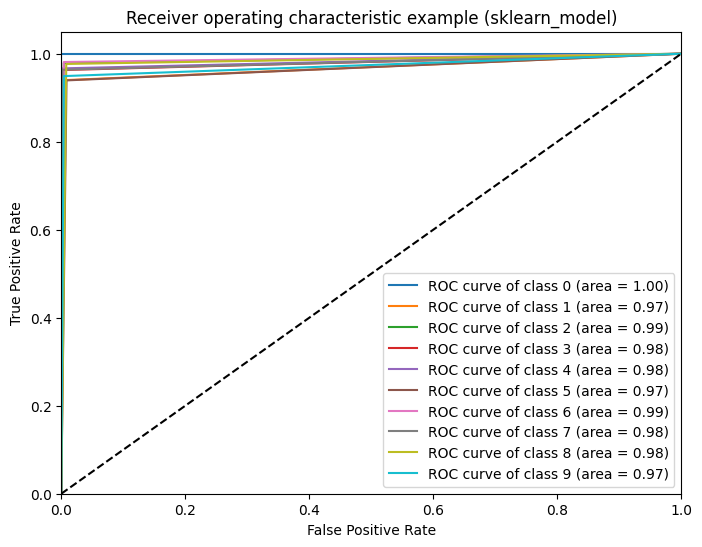

In [ ]:
# Binarize the labels
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
y_pred_bin_sklearn = label_binarize(y_pred_sklearn, classes=np.unique(y_test))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin_sklearn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example (sklearn_model)')
plt.legend(loc="lower right")
plt.show()

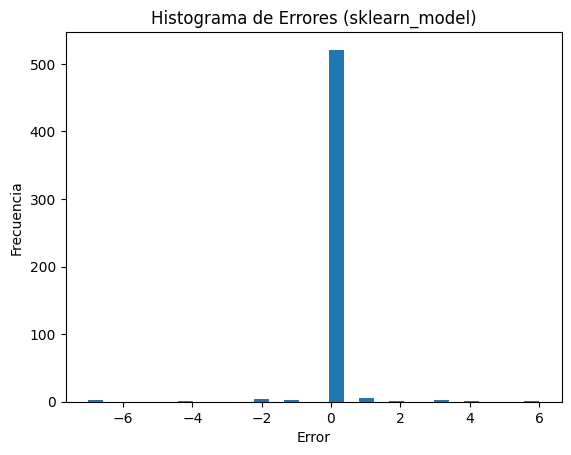

In [ ]:
errors_sklearn = y_test - y_pred_sklearn

plt.hist(errors_sklearn, bins=30)
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.title("Histograma de Errores (sklearn_model)")
plt.show()